## Winning a Kaggle Competition in Python

**Course Structure:**
* CHAPTER 1. Kaggle competition process
* CHAPTER 2. Dive into the competition
* CHAPTER 3. Feature Engineering
* CHAPTER 4. Modeling

### CHAPTER 1. Kaggle Competition Process

#### Part 1.1 Competitions overview

**Kaggle:**
* A web platform for *Data Science and Machine Learning* competitions
* Solve Data Science challenges
* Compete with other participants by building the best predictive models 
* Benefits:
    1. Get practical experience on the real-world data
    2. Develop portfolio projects
    3. Meet a great Data Science community
    4. Try new domain or new model type
    5. Keep up to date with the best-performing methods
* Participation:
    1. Select a competition
    2. Download the data (train and test data)
    3. Build your own model
    4. Submit your result as a *'.csv'* file

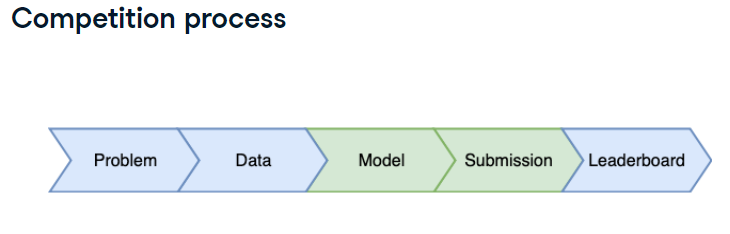

In [51]:
# display the competition process
from IPython import display

display.Image("Images/23_competition_process.png")

In [52]:
# Code for part 1.1

# explore the train data
import pandas as pd

# read train data
train = pd.read_csv('23_datasets/demand_forecasting_train.csv')

# look at the shape of the data
print('Train shape:', train.shape)

# look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


In [53]:
# Code for part 1.1 (continue)

# explore the test data
import pandas as pd

# read the test data
test = pd.read_csv('23_datasets/demand_forecasting_test.csv')

# print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

# 'sales' column is the label column we need to make predictions!

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


#### Part 1.2 Prepare your first submission

**Submission:**
* It usually has two columns: ID and target variable predicted
* A *'.csv'* file that contains our test predictions and is submitted to a Kaggle platform
* Then, Kaggle shows the result on the leaderboard

**Problem type:**
* You need to first decide on the problem type: **classification**, **regression** or **other** 
* Try to plot the label column with *histogram* and you will know the problem type

**Build model:**
* Start with the most simple model 
* Predict on the test set
* Get the result as a starting point

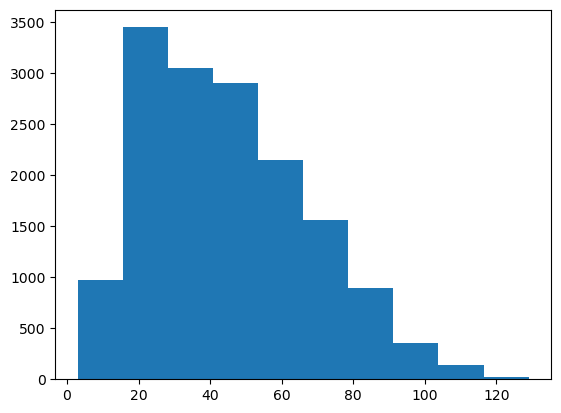

In [54]:
# Code for part 1.2 

# determine a problem type
import matplotlib.pyplot as plt

# get a histogram
plt.hist(train['sales'])
plt.show()

# from the histogram, we can know it is a regression problem.

In [55]:
# Code for part 1.2 (continue)

# train a simple model
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# read the train data
train = pd.read_csv('23_datasets/demand_forecasting_train.csv')

# create a Random Forest object
rf = RandomForestRegressor()

# train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestRegressor()

In [56]:
# Code for part 1.2 (continue)

# prepare a submission
import pandas as pd

# read test data
test = pd.read_csv('23_datasets/demand_forecasting_test.csv')

# make predictions on test data
predictions = rf.predict(test[['store', 'item']])
test['sales'] = predictions

# save to sample_submission.csv file
sample_submission = test[['id', 'sales']]
sample_submission.to_csv('23_datasets/sample_submission.csv', index=False)

# read the sample submission data
sample_submission = pd.read_csv('23_datasets/sample_submission.csv')
print(sample_submission.head())

E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\ANACONDA\envs\pyspark\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


   id      sales
0   0  17.253912
1   1  17.253912
2   2  17.253912
3   3  17.253912
4   4  17.253912


#### Part 1.3 Public VS. Private leaderboard

* Each competition specifies a single metric used to rank the participants
* Commonly used metrics are given as follows
* Kaggle internally split test data into two subsets: Public and Private
* We can go over-fitting since we can only track the results on the Public Leaderboard
* We will need a good validation strategy to avoid that
* 

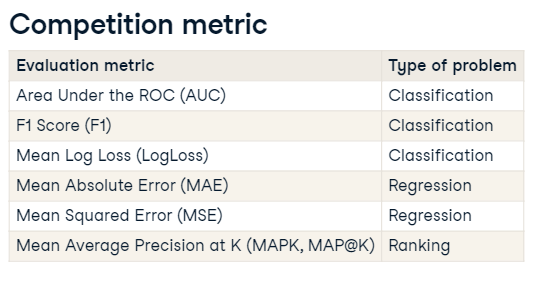

In [57]:
# display competition metric

from IPython import display

display.Image("Images/23_competition_metric.png")

In [58]:
# Code for part 1.3

# train XGB models
import xgboost as xgb
import pandas as pd

# get the data
train = pd.read_csv('23_datasets/demand_forecasting_train.csv')

# create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']], label=train['sales'])

# define xgboost parameters for three different models
params_1 = {'objective': 'reg:linear',
          'max_depth': 2,
          'verbosity': 0}
params_2 = {'objective': 'reg:linear',
            'max_depth': 8,
            'verbosity': 0}
params_3 = {'objective': 'reg:linear',
            'max_depth': 15,
            'verbosity': 0}

# train xgboost model
xg_depth_2 = xgb.train(params=params_1, dtrain=dtrain)
xg_depth_8 = xgb.train(params=params_2, dtrain=dtrain)
xg_depth_15 = xgb.train(params=params_3, dtrain=dtrain)

E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
E:\ANACONDA

In [59]:
# compare additional training data 
import numpy as np
import pandas as pd

id = []
# date = []
store = []
item = []
sales = []

# number
with open('23_datasets/id.txt') as file1:
    for line in file1:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        id.append(cleaned_line)
id = np.loadtxt(id)

# string
with open('23_datasets/date.txt') as file2:
        date = file2.read()
        # cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        # date.append(line)
# print(date)
date = date.replace("'", "")
date = date.split(',')
# date = np.loadtxt(date)
# print(date)

# number
with open('23_datasets/store.txt') as file3:
    for line in file3:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        store.append(cleaned_line)
store = np.loadtxt(store)

# number
with open('23_datasets/item.txt') as file4:
    for line in file4:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        item.append(cleaned_line)
item = np.loadtxt(item)

# number
with open('23_datasets/sales.txt') as file5:
    for line in file5:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        sales.append(cleaned_line)
sales = np.loadtxt(sales)

# create dataframe 
# print(len(id), len(date), len(store), len(item), len(sales))
additional_train = pd.DataFrame({'id': id,
                                 'date': date,
                                 'store': store,
                                 'item': item,
                                 'sales': sales})
# print(additional_train.head(5))

additional_train.to_csv('23_datasets/demand_forecasting_train_2.csv', index_label=False)

In [60]:
# Code for part 1.3 (continue)

# explore over-fitting XGBoost
import pandas as pd
from sklearn.metrics import mean_squared_error

# get new train and test data sets
train = pd.read_csv('23_datasets/demand_forecasting_train_2.csv')
test = pd.read_csv('23_datasets/demand_forecasting_train.csv')
dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# for loop to check over-fitting
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # make predictions
    train_pred = model.predict(dtrain)
    test_pred = model.predict(dtest)
    
    # calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))
    
# it seems there is no over-fitting here, the MSE for Train and Test are keeping going down!

MSE Train: 1000.988. MSE Test: 331.064
MSE Train: 623.512. MSE Test: 112.057
MSE Train: 550.542. MSE Test: 84.952


E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
E:\ANACONDA\envs\pyspark\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
E:\ANACONDA

### CHAPTER 2. Diving into the Competition

#### Part 2.1 Understand the problem

*